In [28]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("data/kaggle/btceur.csv")
df

,time,open,close,high,low,volume
0,1495181760000,1775.951536,1775.951536,1775.951536,1775.951536,0.010000
1,1495365120000,1877.000000,1877.100000,1877.100000,1877.000000,12.802000
2,1495365720000,1877.300000,1877.300000,1877.300000,1877.300000,0.135183
3,1495365780000,1877.300000,1877.300000,1877.300000,1877.300000,1.148000
4,1495365840000,1877.300000,1877.300000,1877.300000,1877.300000,5.024617
...,...,...,...,...,...,...
913336,1594699320000,8131.000000,8131.000000,8131.000000,8131.000000,0.024228
913337,1594699380000,8130.900000,8130.900000,8130.900000,8130.900000,0.010000
913338,1594699440000,8130.900000,8130.938861,8130.938861,8130.900000,0.147801
913339,1594699500000,8130.900000,8130.900000,8130.900000,8130.900000,0.015654


In [19]:
df["datetime"] = pd.to_datetime(df["time"], unit="ms")

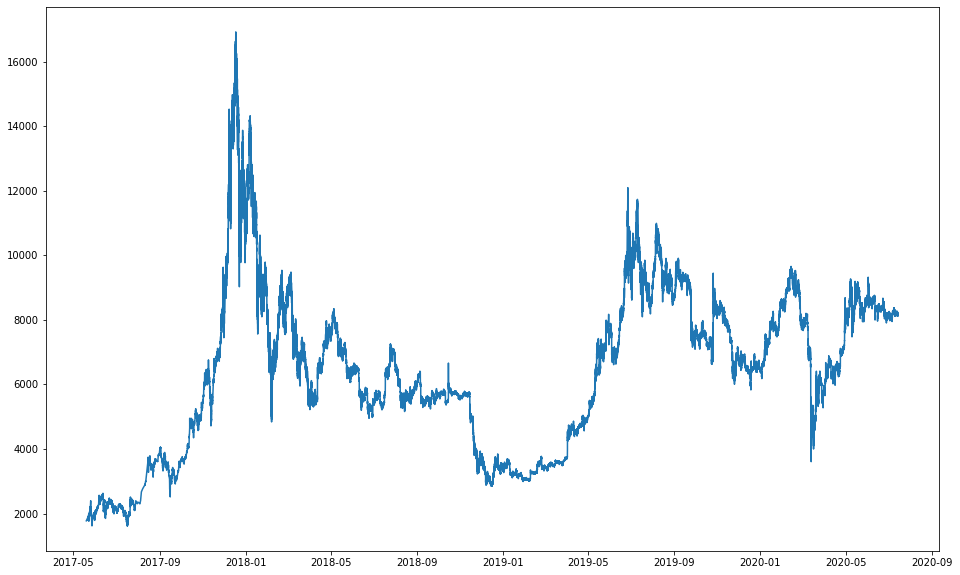

In [20]:
fig = plt.figure(figsize=(16,10))
plt.plot("datetime", "close", data=df)

In [90]:
period_mins = 60 * 1
spans = {"short_EMA": 12*period_mins, "long_EMA": 26*period_mins}

def call_order(data_series):
    if (data_series["sEMA_lEMA_diff"] * data_series["prev_sEMA_lEMA_diff"]) <= 0:
        if data_series["sEMA_lEMA_diff"] >= 0:
            return "buy"
        else:
            return "sell"
    else:
        return "hold"

df["short_EMA"] = df["close"].ewm(span=spans["short_EMA"], min_periods=spans["short_EMA"]).mean()
df["long_EMA"] = df["close"].ewm(span=spans["long_EMA"], min_periods=spans["long_EMA"]).mean()

df["sEMA_lEMA_diff"] = df["short_EMA"] - df["long_EMA"]
df["prev_sEMA_lEMA_diff"] = df["sEMA_lEMA_diff"].shift(1)

df["order"] = df.apply(call_order, axis=1)

df

,time,open,close,high,low,volume,datetime,short_EMA,long_EMA,sEMA_lEMA_diff,prev_sEMA_lEMA_diff,order
0,1495181760000,1775.951536,1775.951536,1775.951536,1775.951536,0.010000,2017-05-19 08:16:00,NaN,NaN,NaN,NaN,hold
1,1495365120000,1877.000000,1877.100000,1877.100000,1877.000000,12.802000,2017-05-21 11:12:00,NaN,NaN,NaN,NaN,hold
2,1495365720000,1877.300000,1877.300000,1877.300000,1877.300000,0.135183,2017-05-21 11:22:00,NaN,NaN,NaN,NaN,hold
3,1495365780000,1877.300000,1877.300000,1877.300000,1877.300000,1.148000,2017-05-21 11:23:00,NaN,NaN,NaN,NaN,hold
4,1495365840000,1877.300000,1877.300000,1877.300000,1877.300000,5.024617,2017-05-21 11:24:00,NaN,NaN,NaN,NaN,hold
...,...,...,...,...,...,...,...,...,...,...,...,...
913336,1594699320000,8131.000000,8131.000000,8131.000000,8131.000000,0.024228,2020-07-14 04:02:00,8174.718027,8185.892159,-11.174133,-11.122944,hold
913337,1594699380000,8130.900000,8130.900000,8130.900000,8130.900000,0.010000,2020-07-14 04:03:00,8174.596479,8185.821702,-11.225223,-11.174133,hold
913338,1594699440000,8130.900000,8130.938861,8130.938861,8130.900000,0.147801,2020-07-14 04:04:00,8174.475376,8185.751384,-11.276008,-11.225223,hold
913339,1594699500000,8130.900000,8130.900000,8130.900000,8130.900000,0.015654,2020-07-14 04:05:00,8174.354501,8185.681107,-11.326606,-11.276008,hold


/usr/local/lib/python3.6/dist-packages/IPython/core/events.py:88: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



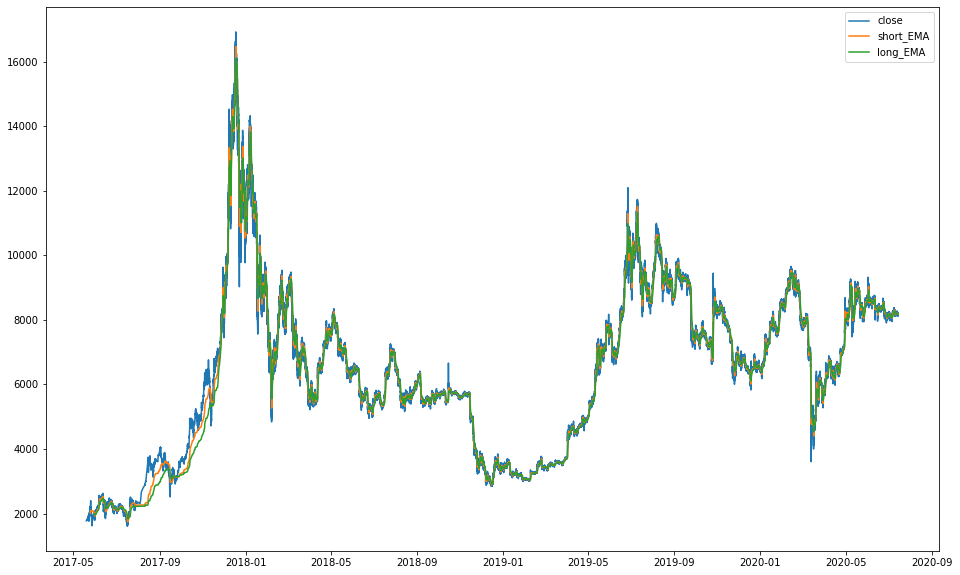

In [91]:
fig = plt.figure(figsize=(16,10))
for y in ["close", "short_EMA", "long_EMA"]:
    plt.plot("datetime", y, data=df, label=y)
plt.legend()

In [92]:
orders_df = df.loc[df["order"] != "hold"].copy()
orders_df

,time,open,close,high,low,volume,datetime,short_EMA,long_EMA,sEMA_lEMA_diff,prev_sEMA_lEMA_diff,order
2242,1496302800000,2052.000000,2052.500000,2052.500000,2052.000000,2.175110,2017-06-01 07:40:00,1967.152530,1967.106780,0.045750,-0.076022,buy
5888,1497287640000,2265.900000,2282.100000,2282.100000,2265.900000,13.058907,2017-06-12 17:14:00,2446.036574,2446.256085,-0.219511,0.025800,sell
8338,1497759000000,2357.700000,2358.300000,2358.600000,2357.700000,5.227526,2017-06-18 04:10:00,2195.234629,2195.004691,0.229938,-0.014159,buy
10190,1498349280000,2232.100000,2232.100000,2232.100000,2232.100000,5.060000,2017-06-25 00:08:00,2323.190202,2323.245663,-0.055461,0.080991,sell
12195,1498721580000,2209.800000,2209.800000,2209.800000,2209.800000,0.008289,2017-06-29 07:33:00,2172.203540,2172.190616,0.012924,-0.043408,buy
...,...,...,...,...,...,...,...,...,...,...,...,...
909671,1594312920000,8157.200000,8157.332652,8157.332652,8157.200000,0.319569,2020-07-09 16:42:00,8268.471353,8268.592805,-0.121452,0.044963,sell
911724,1594525920000,8227.538969,8227.538969,8227.538969,8227.538969,0.008585,2020-07-12 03:52:00,8192.082166,8192.038776,0.043391,-0.009695,buy
912118,1594573320000,8168.300000,8168.300000,8168.300000,8168.300000,0.032046,2020-07-12 17:02:00,8194.714067,8194.739602,-0.025535,0.014021,sell
912386,1594599480000,8235.300000,8235.300000,8235.300000,8235.300000,0.033500,2020-07-13 00:18:00,8192.965287,8192.911774,0.053514,-0.009868,buy


In [93]:
orders_df["buy_price"] = orders_df["close"].shift(1)
trades_df = orders_df.loc[orders_df["order"] == "sell"].copy()
trades_df.rename(columns={"close": "sell_price"})
trades_df

,time,open,close,high,low,volume,datetime,short_EMA,long_EMA,sEMA_lEMA_diff,prev_sEMA_lEMA_diff,order,buy_price
5888,1497287640000,2265.9,2282.100000,2282.100000,2265.9,13.058907,2017-06-12 17:14:00,2446.036574,2446.256085,-0.219511,0.025800,sell,2052.500000
10190,1498349280000,2232.1,2232.100000,2232.100000,2232.1,5.060000,2017-06-25 00:08:00,2323.190202,2323.245663,-0.055461,0.080991,sell,2358.300000
12290,1498734600000,2142.3,2142.200000,2142.300000,2142.2,2.905397,2017-06-29 11:10:00,2172.340957,2172.369872,-0.028915,0.016222,sell,2209.800000
12587,1498809600000,2142.7,2142.700000,2142.700000,2142.7,4.875900,2017-06-30 08:00:00,2172.505891,2172.529123,-0.023232,0.021410,sell,2208.600000
12651,1498831260000,2156.8,2156.800000,2156.800000,2156.8,0.016600,2017-06-30 14:01:00,2172.521266,2172.523945,-0.002679,0.020880,sell,2181.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903908,1593705780000,8068.2,8045.100000,8068.200000,8045.1,4.653146,2020-07-02 16:03:00,8177.271894,8177.282711,-0.010818,0.187263,sell,8148.855324
905751,1593932520000,8064.5,8065.200000,8065.200000,8064.5,0.613841,2020-07-05 07:02:00,8108.854572,8108.907102,-0.052530,0.012830,sell,8121.100000
909671,1594312920000,8157.2,8157.332652,8157.332652,8157.2,0.319569,2020-07-09 16:42:00,8268.471353,8268.592805,-0.121452,0.044963,sell,8153.014357
912118,1594573320000,8168.3,8168.300000,8168.300000,8168.3,0.032046,2020-07-12 17:02:00,8194.714067,8194.739602,-0.025535,0.014021,sell,8227.538969


In [94]:
trades_df["profitability"] = trades_df["close"] / trades_df["buy_price"] - 1
trades_df

,time,open,close,high,low,volume,datetime,short_EMA,long_EMA,sEMA_lEMA_diff,prev_sEMA_lEMA_diff,order,buy_price,profitability
5888,1497287640000,2265.9,2282.100000,2282.100000,2265.9,13.058907,2017-06-12 17:14:00,2446.036574,2446.256085,-0.219511,0.025800,sell,2052.500000,0.111864
10190,1498349280000,2232.1,2232.100000,2232.100000,2232.1,5.060000,2017-06-25 00:08:00,2323.190202,2323.245663,-0.055461,0.080991,sell,2358.300000,-0.053513
12290,1498734600000,2142.3,2142.200000,2142.300000,2142.2,2.905397,2017-06-29 11:10:00,2172.340957,2172.369872,-0.028915,0.016222,sell,2209.800000,-0.030591
12587,1498809600000,2142.7,2142.700000,2142.700000,2142.7,4.875900,2017-06-30 08:00:00,2172.505891,2172.529123,-0.023232,0.021410,sell,2208.600000,-0.029838
12651,1498831260000,2156.8,2156.800000,2156.800000,2156.8,0.016600,2017-06-30 14:01:00,2172.521266,2172.523945,-0.002679,0.020880,sell,2181.400000,-0.011277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903908,1593705780000,8068.2,8045.100000,8068.200000,8045.1,4.653146,2020-07-02 16:03:00,8177.271894,8177.282711,-0.010818,0.187263,sell,8148.855324,-0.012733
905751,1593932520000,8064.5,8065.200000,8065.200000,8064.5,0.613841,2020-07-05 07:02:00,8108.854572,8108.907102,-0.052530,0.012830,sell,8121.100000,-0.006883
909671,1594312920000,8157.2,8157.332652,8157.332652,8157.2,0.319569,2020-07-09 16:42:00,8268.471353,8268.592805,-0.121452,0.044963,sell,8153.014357,0.000530
912118,1594573320000,8168.3,8168.300000,8168.300000,8168.3,0.032046,2020-07-12 17:02:00,8194.714067,8194.739602,-0.025535,0.014021,sell,8227.538969,-0.007200


In [95]:
initial_amount = 1000
amount = initial_amount

for profitability in trades_df.loc[~trades_df["profitability"].isna(), "profitability"]:
    amount = amount * (1 + profitability)

final_prof = amount / initial_amount - 1
print(f"Starting with {initial_amount} and finishing with {amount}, it is a {final_prof} profitability.")

Starting with 1000 and finishing with 5452.646074215557, it is a 4.452646074215557 profitability.


In [96]:
trades_df["profitability"].describe()

count    253.000000
mean       0.010405
std        0.103417
min       -0.114906
25%       -0.023640
50%       -0.010531
75%        0.010541
max        1.275408
Name: profitability, dtype: float64

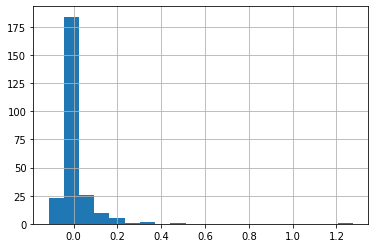

In [97]:
trades_df["profitability"].hist(bins=20)

In [98]:
df["close"].max() / df["close"].min() -1

9.494171626984127

In [103]:
df.loc[df.shape[0]-1, "close"] / df.loc[0, "close"].min() -1

3.5779965483422957